# Density Estimation
We have seen that clustering algorithms aim to mine the underlying structure of data by breaking it into coherent groups. For example k-means clustering **allows to identify parts of the feature space with high density (i.e., a large number of observations)** by partitioning all observations into a **a discrete sets of $K$ data groups distributed around centroids**.

An alternative **smoother** approach would be to study the probability $P(X)$, where $X$ is the data. Indeed, if we could determine the probability value of an given point in space $\mathbf{x}$, we could naturally discover clusters in the data (**zones with high probability values**). Knowing the distribution of the data is also useful for a number of things:

* Similar to clustering, if $X$ is a series of observations of customers in a bank (e.g., age, sex, balance, salary, etc.), we may want to know $P(X)$ to understand which types of customers are more frequent (those that have large $P(X)$ values), or if there are different distinct groups of customers (e.g., if $P(X)$ has more than one mode);
* If $X$ is a set of images of faces, knowing $P(X)$ would allow us to understand if an image $x$ looks like an image of a face or not, which faces are more frequent, if there are more than one "groups" of faces, etc. If we could draw $x \sim P$, we could even generate new images of faces! (**by the way, this is what Generative Adversarial Networks do**);
* If $X$ is a series of observations of bank transactions, by modeling $P(X)$ we can infer if a given observation $\mathbf{x}$ is a typical transaction (high $P(\mathbf{x}$)) or whether it is an anomaly (low $P(X)$). If we can make assumptions on the nature of $P(X)$,, we can even make inference on the properties of a given data point $\mathbf{x}$. For instance, if $P$ is Gaussian, then datapoints which are further from the center are atypical and they can hence identify anomalous transactions.

A probability density is **a continuous function**, so estimating it is not as straightforward as estimating a **probability mass function**. There are two main classes of methods for density estimation:

* **Non-parametric methods**: these methods aim to estimate the density **directly from the data, without strong assumptions on the source distribution**. The main advantage of these methods is that they generally have few hyper-parameters to tune and can be used when no assumption can be made on the source of the data. A disadvantage is that, while we can numerically compute $f(\mathbf{x})$ with these methods (where $f$ is the density function), we do not know the analytical form or property of $f$;
* **Parametric methods**: these methods aim to **fit a known distribution to the data**. An example of this approach is **fitting a Gaussian to the data**. The main advantage of these methods is that they provide an analytical form for the density $f$, which can be useful in a number of contexts (for instance, the density may be part of a cost function we want to optimize). The downside is that these methods make strong assumptions on the nature of the data.

In the following, we will see the main representatives of these two classes of methods.

## Non-parametric Density Estimation Techniques

We hence usually resort to different approaches, the main of which are:

* **Fixed windows**: this consists in "discretizing" the range of the the variable $\mathbf{X}$ in "bins" of size $r$ and counting how many values fall within each window. **Histogram** belong to this class of methods for density estimation. Note that histograms can also be **extended to multiple dimensions** by considering d-dimensional tiles (e.g., square tiles in $\Re^2$);
* **Mobile windows**: as in histograms, the range of $\mathbf{X}$ the density estimation is performed by dividing the space into d-dimensional windows. However, in this case, the windows are not fixed, but mobile and overlapping, meaning that, given a point $\mathbf{x}$, we can estimate the density at $\mathbf{x}$ by centering a window around $\mathbf{x}$. **Kernel density estimation methods** as the one we saw at the beginning of the course fall in this category. This is also known as **Parzen window**.
* **Fixed samples**: rather than discretizing the range of $\mathbf{X}$, at any given point $\mathbf{x}$, we estimate the density $f(\mathbf{x})$ by looking at the $K$ closest point in space, where $K$ is fixed and comparing them to the size of a neighborhood containing all of them. We will see that this strategy is used to define the K-NN classification algorithm. 

The figure below illustrates three examples of density estimation using the three approaches above for an example dataset.

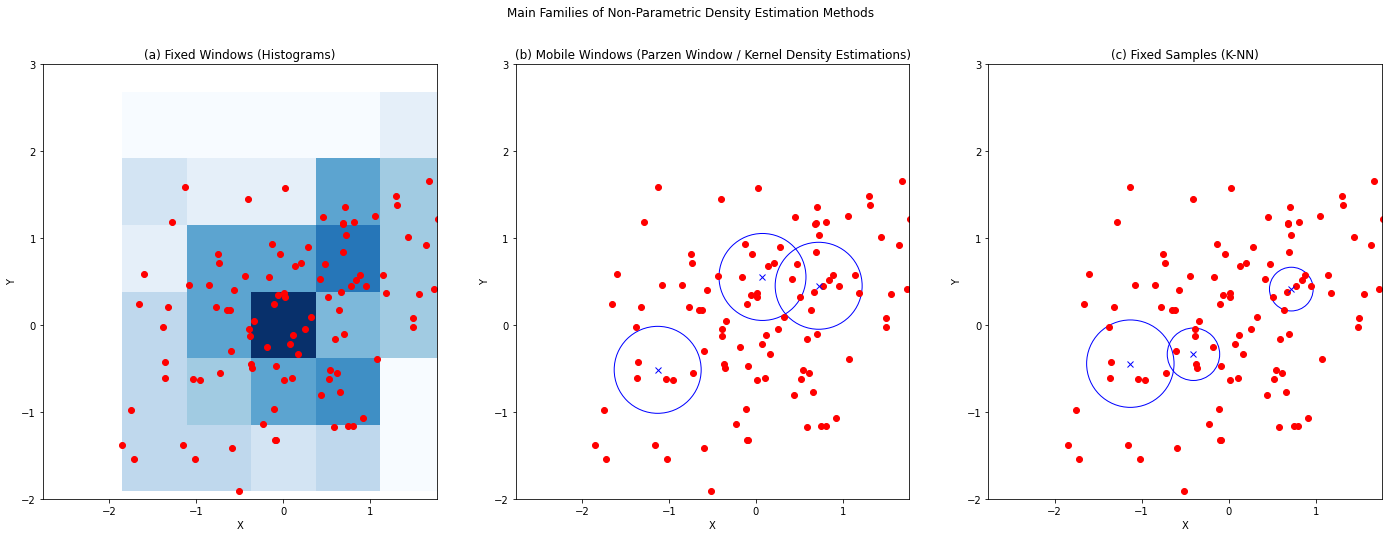

In [323]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
# data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=50)
# data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 1

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
_,axes=plt.subplots(figsize=(24,8),nrows=1,ncols=3)

for j in range(3):
    if j==0:
        a,b,c,d=axes[j].hist2d(data[:, 0], data[:, 1], bins=[num_x_bins, num_y_bins], cmap='Blues', density=True)
        #((np.diff(b).reshape(-1,1) * np.diff(c).reshape(1,-1))*a).sum() # check that it integrates to 1
        axes[j].plot(data[:,0],data[:,1],'o',color='red')
        axes[j].set_title('(a) Fixed Windows (Histograms)')
    elif j==1:
        axes[j].plot(data[:,0],data[:,1],'o',color='red')
        axes[j].set_title('(b) Mobile Windows (Parzen Window / Kernel Density Estimations)')
        nc = 3
        for i in range(nc):
            c = data[np.random.choice(len(data))]
            i1 = np.random.choice(len(data))
            i2 = np.random.choice(len(data))
            c = data[[i1,i2],[0,1]]
            axes[j].plot(c[0],c[1], 'x',color='blue')
            circle = plt.Circle(c, 0.5, edgecolor='blue', facecolor='none')

            axes[j].add_patch(circle)
    elif j==2:
        idx = np.random.permutation(len(data))
        d1 = data[idx[int(len(data)/2):]]
        d2 = data[idx[:int(len(data)/2)]]

        axes[j].plot(d1[:,0],d1[:,1],'o',color='red')
        axes[j].plot(d2[:,0],d2[:,1],'o',color='red')
        axes[j].set_title('(c) Fixed Samples (K-NN)')
        nc = 3
        nsamples = 6
        np.random.seed(10)
        for i in range(nc):
            c = data[np.random.choice(len(data))]
            i1 = np.random.choice(len(data))
            i2 = np.random.choice(len(data))
            c = data[[i1,i2],[0,1]]
            for r in np.linspace(0,5,200):
                num = ((data[:,0]-c[0])**2+(data[:,1]-c[1])**2 < r**2).sum()
                if num >= nsamples:
                    axes[j].plot(c[0],c[1], 'x',color='blue')
                    circle = plt.Circle(c, r, edgecolor='blue', facecolor='none')
                    axes[j].add_patch(circle)
                    break
    
    
    
    # Set labels and title
    axes[j].set_xlabel('X')
    axes[j].set_ylabel('Y')
    axes[j].axis('equal')
    


    # Show colorbar
    #cbar = plt.colorbar()
    cbar.set_label('Density')

    axes[j].set_xticks(np.arange(-3,8))
    axes[j].set_yticks(np.arange(-3,8))
    axes[j].set_xlim([-3,2])
    axes[j].set_ylim([-2,3])
    #plt.grid()

plt.suptitle('Main Families of Non-Parametric Density Estimation Methods')

# Display the plot
plt.show()


(a) The space is divided into non-overlapping square tiles (other shapes could be used as long as they'll cover the whole space), then the density for each square is computed by considering the number of examples falling into each square. (b) Given an arbitrary point $\mathbf{x}$ in the n-dimensional space, a neighborhood of a given radius $r$ is considered and the density for that point is estimated by considering the number of examples falling in the neighborhood. (c) Given an arbitrary point $\mathbf{x}$ in the n-dimensional space, we consider a neighborhood centered at $\mathbf{x}$ and radius $R_k(\mathbf{x})$ large enough to contain $K$ points. The density at $\mathbf{x}$ is computed by considering the size $R_k(\mathbf{x})$ (the smaller, the denser).

### Fixed Windows - D-Dimensional Histograms
Density estimation can be easily performed using D-Dimensional histograms. This method is the same as the one we saw in the case of 1-d histograms, but in general, **we will divide the D-Dimensional space into D-Dimensional regions (typically hypercubes)**. In the 2D case, these will simply be square tiles. The algorithm hence assigns a uniform density value to each region.

Let $\mathbf{X}$ be our set of observations and let $R_i$ be the $i^{th}$ region of a set of $\mathcal{R}=\{R_i\}_i$ regions in which we divided the space. We will assign the following density value to the $R_i$ region:

$$f(R_i) = \frac{|\{\mathbf{x} \in \mathbf{X} \cup R_i\}|}{|\mathbf{X}| \cdot V(R_i)}$$

where $V(R_i)$ is the volume of $R_i$. If $R_i$ is 1-dimensional (hence a segment), this will be its length, if $R_i$ is 2D, then it will be its area.

Recall that the probability of finding a value $\mathbf{x}$ in a given region $R$ is in general given by:

$$P(\mathcal{x} \in R_i)=\int_{R_i} f(\mathbf{x}) d\mathbf{x} = V(R_i) \cdot f(R_i)$$

The last part of the equality is true because we assigned uniform density values to each region.

We hence obtain that:

$$P(\mathcal{x} \in \mathcal{X}) = \sum_i P(R_i) = \sum_i V(R_i) \cdot f(R_i) = \sum_i V(R_i) \frac{|\{\mathbf{x} \in \mathbf{X} \cup R_i\}|}{|\mathbf{X}| \cdot V(R_i)} = $$

$$= \frac{V(R_i)}{V(R_i) |\mathbf{X}|}  \sum_i |\{\mathbf{x} \in \mathbf{X} \cup R_i\}| = \frac{V(R_i) |\mathbf{X}|}{V(R_i) |\mathbf{X}|} = 1$$

**Hence we can treat the density estimate as a valid probability density function.**

The plot below shows an example density estimation for a set of data. Note that **this approach has a few hyper-parameters which determine the size and position of the regions**. 

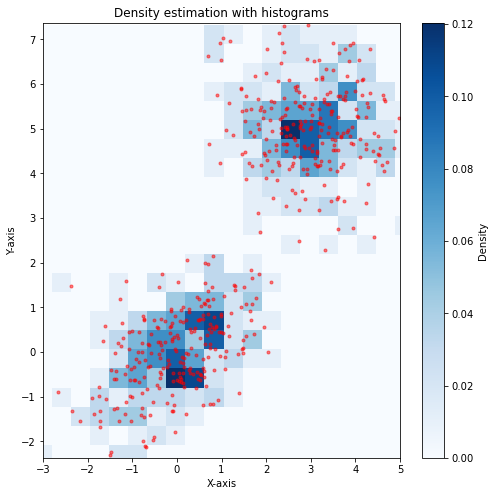

In [458]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=250)
data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=250)

data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 0.5

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
plt.figure(figsize=(8, 8))
plt.plot(data[:,0],data[:,1],'.r', alpha=0.5)
plt.hist2d(data[:, 0], data[:, 1], bins=[num_x_bins, num_y_bins], cmap='Blues', density=True)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.title('Density estimation with histograms')


# Show colorbar
cbar = plt.colorbar()
cbar.set_label('Density')

plt.xticks(np.arange(-3,8))
plt.yticks(np.arange(-3,8))
plt.xlim([-3,5])
plt.ylim([-2,7])
#plt.grid()

# Display the plot
plt.show()


### Mobile Windows - Parzen Window / Kernel Density Estimation
While histograms allow to estimate density by placing a fixed grid on the data, the Parzen window approach, also known as kernel density estimation, places **a window, or region, around each arbitrary point in space $\mathbf{x}$**. This has the big advantage to allow us to estimate density values at arbitrary points **rather than setting fixed density over all points in a region**.

A naive approach to density estimation through Parzen Window would assign a point $\mathbf{x}$ a density by simply computing the fraction of points of $\mathbf{X}$ which fall between a neighborhood of size $r$ (where $r$ is a hyper-parameter) of $\mathbf{x}$, as follows:

$$f(\mathbf{x}) = \frac{|N(\mathbf{x},h)\}|}{\alpha|\mathbf{X}|}$$

where $$N(\mathbf{x},h) = \{\mathbf{y} \in \mathbf{X}\ s.t.\ ||\mathbf{y} - \mathbf{x}||_2 < h \}$$

is a neighborhood of $\mathbf{X}$ centered at $\mathbf{x}$ and of radius $h$, and $\alpha$ is a constant introduced to make sure that the density integrates to $1$: 

$$\int_{\mathbf{x} \in \Re^d} f(\mathbf{x}) d\mathbf{x}= 1$$

The plot below shows some density estimates using this method:

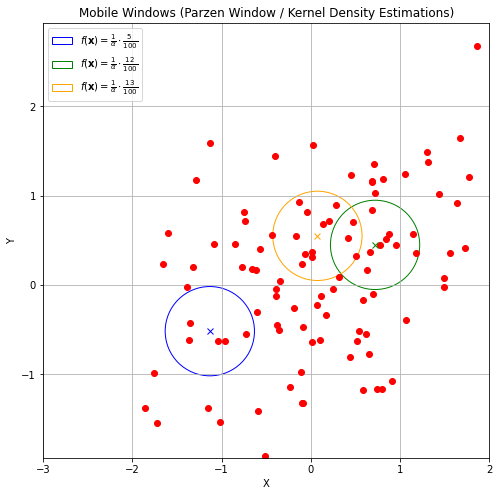

In [337]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
# data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=50)
# data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 1

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Create a square bin plot
plt.figure(figsize=(8,8))

plt.plot(data[:,0],data[:,1],'o',color='red')
plt.title('Mobile Windows (Parzen Window / Kernel Density Estimations)')
nc = 3
colors = ['blue', 'green', 'orange']
for i in range(nc):
    c = data[np.random.choice(len(data))]
    i1 = np.random.choice(len(data))
    i2 = np.random.choice(len(data))
    c = data[[i1,i2],[0,1]]
    plt.plot(c[0],c[1], 'x',color=colors[i])
    nn = ((data[:,0]-c[0])**2+(data[:,1]-c[1])**2 < 0.5**2).sum()
    circle = plt.Circle(c, 0.5, edgecolor=colors[i], facecolor='none', label="$f(\\mathbf{x})=\\frac{1}{\\alpha} \\cdot \\frac{"+f"{nn}"+"}{"+f"{len(data)}"+"}$")

    plt.gca().add_patch(circle)

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

# Show colorbar
#cbar = plt.colorbar()
cbar.set_label('Density')

plt.xticks(np.arange(-3,8))
plt.yticks(np.arange(-3,8))
plt.xlim([-3,2])
plt.ylim([-2,3])
plt.legend()
plt.grid()
# Display the plot
plt.show()


We can also write the expression above as:

$$f(\mathbf{x}) = \frac{1}{|\mathbf{X}|} \sum_{i=1}^{|\mathbf{X}|} K_h\left(\mathbf{x}_i - \mathbf{x}\right) $$

where $K_h$ is defined as:

$$K_h\left(\mathbf{x}_i - \mathbf{x}\right) = \begin{cases} \frac{1}{\pi h^2} & \text{if } ||\frac{\mathbf{x}_i - \mathbf{x}}{h}||_2 \leq 1 \\ 0 & \text{otherwise} \end{cases}$$

We will call $K_h$ **a kernel function** depending on the bandwidth parameter $h$. This is a function which assigns a weight to a point $\mathbf{x}_i$ depending on its distance from $\mathbf{x}$. In the example above, we chose $K_h$ as **a circular (or radial) kernel** which assigns a uniform score to all points falling in a circle of radius $h$ centered at $\mathbf{x}$. The score of $\frac{1}{\pi h^2}$ is chosen so that the density $f$ integrates to $1$.

A main problem with this density estimation approach is that **it can be very sensitive on the location at which we are computing the density**. Indeed, we can find cases in which we obtain very different density when we move the circle by a little bit.

We can note that **this is due by the kernel $K$ making "hard decisions" on which elements to assign a non-zero score and which ones to assign a zero score**. Indeed, if we plot the kernel as a function of the distance between $\mathbf{x}$ and $\mathbf{x}_i$, rescaled by $h$, we obtain the following picture:

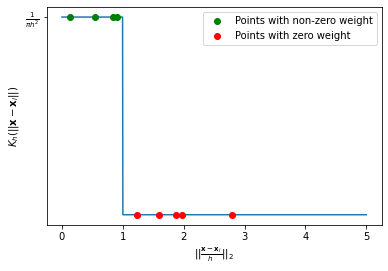

In [394]:
np.random.seed(44)
x = np.linspace(0,5,1000)
y = np.ones(len(x))*1/(np.pi)
dd = np.random.normal(0,1.5,20)
dd1 = dd[(dd>0) & (dd<=1)]
dd2 = dd[dd>1]
y[x>1] = 0

plt.plot(x,y)
plt.xlabel('$||\\frac{\\mathbf{x}-\\mathbf{x}_i}{h}||_2$')
plt.ylabel('$K_h(||\\mathbf{x}-\\mathbf{x}_i||)$')
plt.yticks([y[0]],["$\\frac{1}{\pi h^2}$"])
plt.plot(dd1,np.ones_like(dd1)/np.pi,'o', color='green', label='Points with non-zero weight')
plt.plot(dd2,np.zeros_like(dd2),'o', color='red', label='Points with zero weight')
plt.legend()
plt.show()



The plot also plots points putting their distance from $\mathbf{x}$ in the x axis and the assigned weight in the y axis. As can be noted, even very close points in the x axis (e.g., the last of the green ones and the first of the red ones) get assigned very different weights, which makes the overall process sensitive to small shifts.

To reduce this effect, it is common to use a smoother kernel which assigns a decreasing weight to points as their distance from $\mathbf{x}$ grows. Common choices for kernels are the Epanechnikov kernel and the Gaussian Kernel, which are defined as follows:

**Epanechnikov Kernel**
$$K_h(\mathbf{u}) = \frac{3}{4h^2} \left(1 - \frac{\|\mathbf{u}\|^2}{h^2}\right) \mathbb{I}(\|\mathbf{u}\| \leq h)$$

**Gaussian Kernel**
$$K_h(\mathbf{x}) = \frac{1}{(2\pi h^2)^{d/2}} \exp\left(-\frac{\|\mathbf{x}\|^2}{2h^2}\right)$$

where $d$ is the dimensionality of the data ($2$ in our examples).

The plot below compares the scores assigned to points depending on their distance from $\mathbf{x}$ according to the three kernels seen so far:

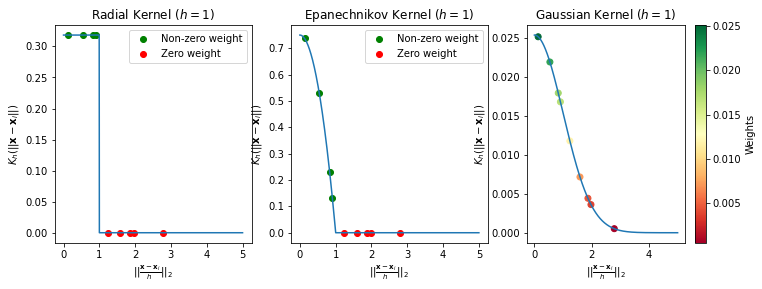

In [405]:
_, axs = plt.subplots(figsize=(12,4), nrows=1,ncols=3)
np.random.seed(44)
x = np.linspace(0,5,1000)
dd = np.random.normal(0,1.5,20)
dd1 = dd[(dd>0) & (dd<=1)]
dd2 = dd[dd>1]


for i in range(3):
    if i==0:
        y = np.ones(len(x))*1/(np.pi)
        y[x>1] = 0
        dd1y = np.ones_like(dd1)/np.pi
        dd2y = np.zeros_like(dd2)
        axs[i].set_title("Radial Kernel ($h=1$)")
        axs[i].plot(dd1,dd1y,'o', color='green', label='Non-zero weight')
        axs[i].plot(dd2,dd2y,'o', color='red', label='Zero weight')
        axs[i].legend()
    elif i==1:
        y = np.ones(len(x))*3/4*(1-x**2)
        y[x>1] = 0
        dd1y = 3/4*(1-dd1**2)
        dd2y = np.zeros_like(dd2)
        axs[i].set_title("Epanechnikov Kernel ($h=1$)")
        axs[i].plot(dd1,dd1y,'o', color='green', label='Non-zero weight')
        axs[i].plot(dd2,dd2y,'o', color='red', label='Zero weight')
        axs[i].legend()
    elif i==2:
        y = np.ones(len(x))*(1/(2*np.pi)**2)*np.exp(-x**2/2)
        dd1y = (1/(2*np.pi)**2)*np.exp(-dd1**2/2)
        dd2y = (1/(2*np.pi)**2)*np.exp(-dd2**2/2)
        axs[i].set_title("Gaussian Kernel ($h=1$)")
        ddd = np.concatenate([dd1,dd2])
        dddy = np.concatenate([dd1y,dd2y])
        sc = axs[i].scatter(ddd,dddy, c=dddy, cmap='RdYlGn',label='Points with non-zero weight')
        cbar = plt.colorbar(sc)
        cbar.set_label('Weights')
        
        
    axs[i].plot(x,y)
    
    axs[i].set_xlabel('$||\\frac{\\mathbf{x}-\\mathbf{x}_i}{h}||_2$')
    axs[i].set_ylabel('$K_h(||\\mathbf{x}-\\mathbf{x}_i||)$')
    #plt.yticks([y[0]],["$\\frac{1}{\pi h^2}$"])
    

plt.show()


This can be seen in 2D as follows:

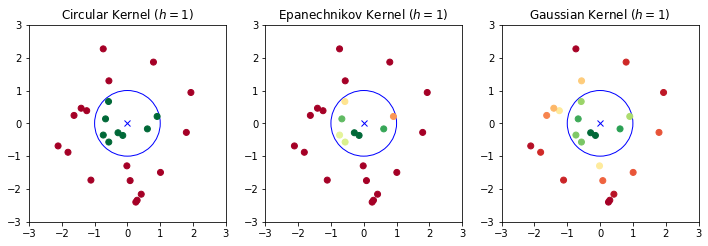

In [453]:
np.random.seed(42)
data = np.random.multivariate_normal((0,0),np.eye(2)*1.5,25)

_,axes=plt.subplots(nrows=1,ncols=3, figsize=(12,4))

h=1

for i in range(3):
    axes[i].add_patch(plt.Circle((0,0),h,facecolor='none', edgecolor='blue'))
    axes[i].plot(0,0,'xb')

    if i==0:
        y = np.ones_like(data[:,0])/np.pi
        y[(data[:,0]**2 + data[:,1]**2)>h**2]=0
        axes[i].set_title('Circular Kernel ($h=1$)')
    elif i==1:
        dist2 = (data[:,0]**2 + data[:,1]**2)
        y = (3/4*(1-dist2**2))
        y[(data[:,0]**2 + data[:,1]**2)>h**2]=0
        axes[i].set_title('Epanechnikov Kernel ($h=1$)')
    elif i==2:
        dist2 = (data[:,0]**2 + data[:,1]**2)
        y = np.ones(len(data[:,0]))*(1/(2*np.pi)**2)*np.exp(-dist2/2)
        axes[i].set_title('Gaussian Kernel ($h=1$)')

    
    axes[i].scatter(data[:,0], data[:,1], c=y, cmap='RdYlGn')
    
    axes[i].set_aspect('equal')
    axes[i].set_xlim([-3,3])
    axes[i].set_ylim([-3,3])

plt.show()

The following plot shows an example of Kernel Density estimation on a sample dataset:

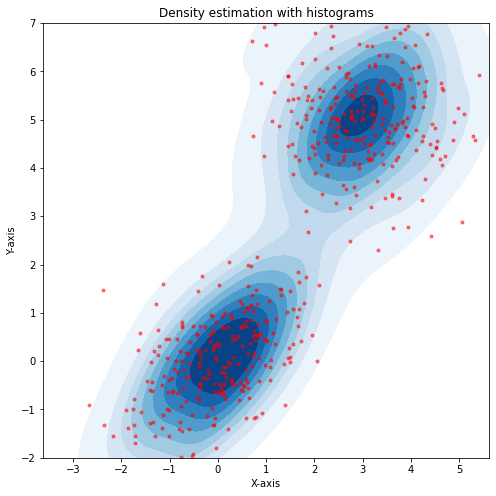

In [459]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=250)
data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=250)

data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 0.5

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
plt.figure(figsize=(8, 8))
plt.plot(data[:,0],data[:,1],'.r', alpha=0.5)
sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap='Blues', fill=True)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.title('Density estimation with histograms')

plt.xticks(np.arange(-3,8))
plt.yticks(np.arange(-3,8))
plt.xlim([-3,5])
plt.ylim([-2,7])
#plt.grid()

# Display the plot
plt.show()


Note that the bandwidth changes the sensitivity of the algorithm. Low bandwidth values (small circles), will make the estimation more sensitive to shifts. Large bandwidth values (large circles) will make the estimation more stable, but the final density may not capture all details of the distribution.

**Also in this case, the bandwidth regulates the trade-off between variance and bias.**

The plot below shows density estimations for different bandwidth values:

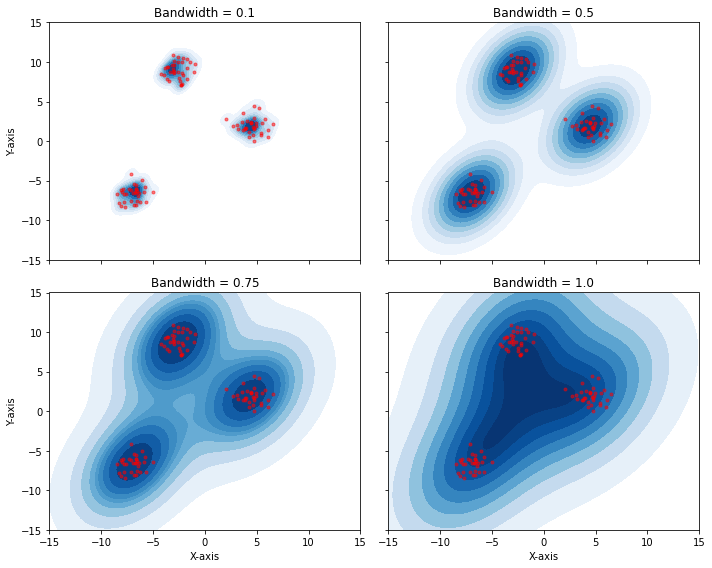

In [483]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(42)
#data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=100)
data,_=make_blobs(100,n_features=2,centers=3)


# Bandwidth values to try
bandwidths = [0.1, 0.5, 0.75, 1.0]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

for i, bandwidth in enumerate(bandwidths):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Plot KDE with different bandwidths
    sns.kdeplot(x=data[:, 0], y=data[:, 1], cmap='Blues', fill=True, bw_method=bandwidth, ax=ax)
    ax.plot(data[:,0], data[:,1], '.r', alpha=0.5)
    
    ax.set_title(f'Bandwidth = {bandwidth}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_xlim([-15,15])
    ax.set_ylim([-15,15])

plt.tight_layout()
plt.show()


### Fixed Samples - K-Nearest Neighbor
With either histograms or mobile windows, we have considered regions with a fixed size (e.g., the bandwidth $h$). In practice, this will lead to regions with very few or zero examples and regions with many examples. This can lead to some limitations as density estimates relying on fewer points will be more unstable (they will have a higher variance) and we will not be able to reliably estimate a density in areas where there are fewer points.

While one way to mitigate this is to use smoother kernels (e.g., the Gaussian one) assigning a non-zero weight to each example, another approach is to choose a neighborhood of $\mathbf{x}$ such that the number of elements in the neighborhood, besides $\mathbf{x}$ is exactly equal to $K$, where $K$ is an hyper-parameter. The advantage of this approach is to always rely on the same sample sample size when estimating the density.

Let $N(\mathbf(x),r)$ be a neighborhood centered at $\mathbf{x}$ with radius $r$. We will define $R_K$ as the **radius of the largest neighborhood centered at $\mathbf{x}$ containing at most $K$ examples, besides $\mathbf{x}$ (if it is included in $\mathbf{X}$)**:

$$R_K(\mathbf{x}) = \sup \{r | N(\mathbf{x},r) \setminus \{\mathbf{x}\}| \leq K\}$$

We will also define $N_K(\mathbf{x})$ as the largest neighborhood of $\mathbf{x}$ containing at most $K$ elements:

$$N_K(\mathbf{x}) = N(\mathbf{x},R_K)$$

K-NN density estimation will assign point $\mathbf{x}$ the following density estimate:

$$f(\mathbf{x}) = \frac{K}{|\mathbf{X}|} \cdot \frac{1}{V_d \cdot R_k(\mathbf{x})}$$

Where $V_d$ is the **volume of the unit d-dimensional ball** and $V_d \cdot R_k^d(\mathbf{x})$ is hence the volume of the d-dimensional ball of radius $R_K(\mathbf{x})$. Intuitively, if $R_k(\mathbf{x})$ is large, then we are in an area which is not very dense, so we will assign a small density value.

The figure below exemplifies the computation in 2D:

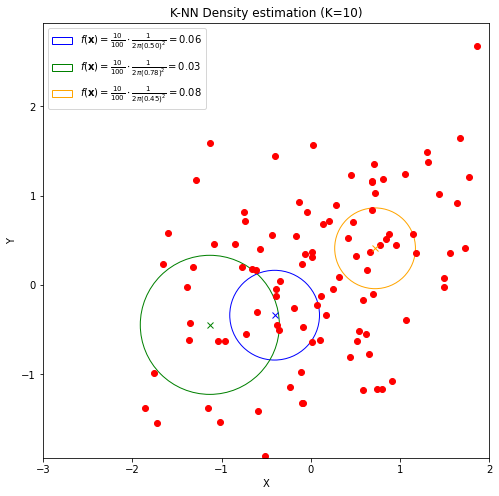

In [500]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random 2D points
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=100)
# data2 = np.random.multivariate_normal([3, 5], [[1, -0.2], [-0.2, 1]], size=50)
# data = np.concatenate([data, data2])

# Set the size of the bins (adjust as needed)
bin_size = 1

# Calculate the range of the plot
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Calculate the number of bins in each dimension
num_x_bins = int((x_max - x_min) / bin_size)
num_y_bins = int((y_max - y_min) / bin_size)

# Create a square bin plot
_,ax=plt.subplots(figsize=(8,8),nrows=1,ncols=1)



idx = np.random.permutation(len(data))
d1 = data[idx[int(len(data)/2):]]
d2 = data[idx[:int(len(data)/2)]]

ax.plot(d1[:,0],d1[:,1],'o',color='red')
ax.plot(d2[:,0],d2[:,1],'o',color='red')
ax.set_title('K-NN Density estimation (K=10)')

nc = 3
nsamples = 10
np.random.seed(10)
colors = ['blue', 'green', 'orange']
for i in range(nc):
    c = data[np.random.choice(len(data))]
    i1 = np.random.choice(len(data))
    i2 = np.random.choice(len(data))
    c = data[[i1,i2],[0,1]]
    for r in np.linspace(0,5,200):
        num = ((data[:,0]-c[0])**2+(data[:,1]-c[1])**2 < r**2).sum()
        if num >= nsamples:
            ax.plot(c[0],c[1], 'x',color=colors[i])
            d = nsamples/len(data) * 1/(2*np.pi*r**2)
            circle = plt.Circle(c, r, edgecolor=colors[i], facecolor='none', label = "$f(\\mathbf{x})=\\frac{"+f"{nsamples}"+"}{"+f"{len(data)}"+"} \\cdot \\frac{1}{2 \\pi ("+f"{r:0.2f}"+")^2}="+f"{d:0.2f}"+"$")
            ax.add_patch(circle)
            break
    


# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axis('equal')



# Show colorbar
#cbar = plt.colorbar()
cbar.set_label('Density')

ax.set_xticks(np.arange(-3,8))
ax.set_yticks(np.arange(-3,8))
ax.set_xlim([-3,2])
ax.set_ylim([-2,3])
plt.legend()
#plt.grid()

# Display the plot
plt.show()

We will not see more details on this method, as kernel Density Estimation is in practice the most used **non-parametric density estimation method**. However, we will see how this approach will turn useful and practical to define classification algorithms.

## Non-Parametric Density Estimation

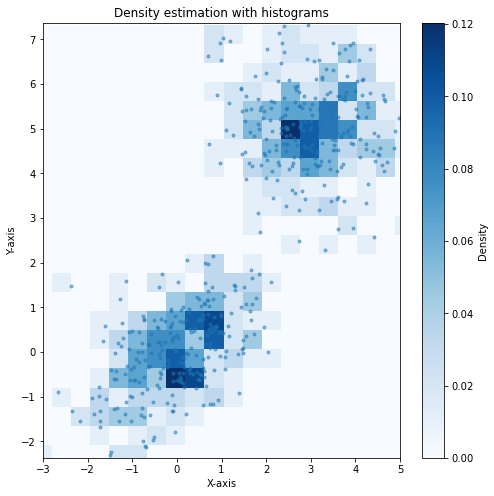

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [255]:
np.linspace(0,10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

array([-1.32242966,  0.2006002 ])

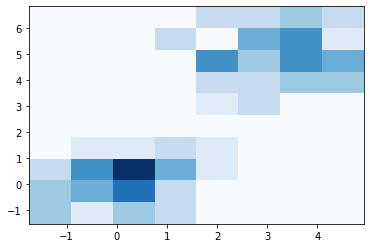

In [186]:
a,b,c,d=plt.hist2d(data[:, 0], data[:, 1], bins=[num_x_bins, num_y_bins], cmap='Blues', density=True)

In [203]:
b.reshape(1,-1)*d.reshape(1,1,-1)

AttributeError: 'QuadMesh' object has no attribute 'reshape'

In [210]:
np.diff(b).shape

(8,)

In [211]:
np.diff(c).shape

(10,)

1.0

nshape

We have seen that, when we can assume that the data follows a Gaussian distribution, it can be convenient to fit a D-dimensional Gaussian to the data and **summarize the data with distribution**. In practice, this consists in estimating a D-dimensional mean vector $\mathbf{\mu}$ and a $D \times D$ covariance matrix $\mathbf{\Sigma}$.

Once the Gaussian has been fitted to the data, we can use it as **a model of the data**. This consists in assuming that the data **has been generated by the model**. If this is true, then we have access to an analytical form of the distribution $P(X)$, which can be useful for a number of things:
* To make assumption on the data. If the data is Guassian, then we know that **the most frequent value will be the mean**. Moreover, the covariance matrix will tell us about how much the data is **dispersed** along the different directions and about **correlations** in the data;
* If the analytical form of $P(X)$ is given, we can usually **sample from it**, i.e., generate new values $\mathbf{x}$ according to the distribution. This could be useful for **data generation or augmentation**.
* Given a new element $\mathbf{x}$, we can check **how likely it is that the element belongs to the population**. For instance, if the model is Gaussian, we can measure the distance with respect to the mean and divide by the standard deviation. If this is a large number, then the element is unlikely to belong to the population (it has a low probability). This can be useufl for **anomaly detection**;
* We can use the model to measure the probability of a given element $\mathbf{x}$. This can be useful to estimate other probabilities, e.g., by using the Bayes' theorem.

Methods that study the probabilty $P(X)$ (or $P(X_1, X_2, ..., X_n$) when there are different variables) are called **generative models**.

In practice, however **data is not always Gaussian**. As we have seen in the case of clustering, we can expect that our data is actually grouped under different clusters. Think about the Old Faithful dataset. Since the data **has two modes**, a Guassian model would lead to a poor fit.

The plot below compares a Guassian fit with a Kernel Density Estimation form the same data. The data has been standardized.



/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_88770/1581349891.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  axes[0].contour(x, y, pdf_values, levels=10, cmap='viridis', linestyles='dashed', label='Gaussian Mixture Model Fit')


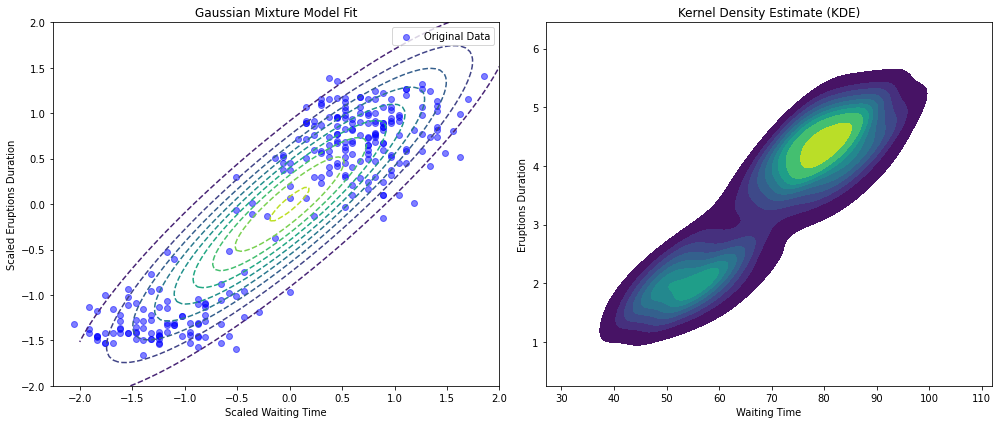

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load Old Faithful dataset from seaborn
faithful_data = sns.load_dataset("geyser")

# Extract relevant columns for this example
faithful_data_selected = faithful_data[['waiting', 'duration']]

# Standardize the data
scaler = StandardScaler()
faithful_data_scaled = scaler.fit_transform(faithful_data_selected)

# Fit a Gaussian Mixture Model to the data
gmm = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm.fit(faithful_data_scaled)

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
pos = np.dstack((x, y))
# Evaluate the Gaussian Mixture Model PDF on the meshgrid
pdf_values = np.exp(gmm.score_samples(pos.reshape(-1, 2)))
pdf_values = pdf_values.reshape(100, 100)

# Scatter plot of the original data and Gaussian Mixture Model fit on the left
axes[0].scatter(faithful_data_scaled[:, 0], faithful_data_scaled[:, 1], color='blue', alpha=0.5, label='Original Data')
axes[0].contour(x, y, pdf_values, levels=10, cmap='viridis', linestyles='dashed', label='Gaussian Mixture Model Fit')
axes[0].set_xlabel('Scaled Waiting Time')
axes[0].set_ylabel('Scaled Eruptions Duration')
axes[0].set_title('Gaussian Mixture Model Fit')
axes[0].legend()



# KDE plot on the right
sns.kdeplot(data=faithful_data_selected, x='waiting', y='duration', fill=True, ax=axes[1], cmap='viridis')
axes[1].set_xlabel('Waiting Time')
axes[1].set_ylabel('Eruptions Duration')
axes[1].set_title('Kernel Density Estimate (KDE)')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


As can be seen the unimodal Guassian distribution is not a good fit. Indeed, the center of the Gaussian lies in an area with low density, as shown by the density estimation on the right.

## References
 - https://en.wikipedia.org/wiki/Metric_space
 - https://en.wikipedia.org/wiki/Measure_(mathematics)
 - Section 19 of notes of the course "Fondamenti di Analisi dei Dati" 2022/2023 - Prof. Giovanni Gallo
 - https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation
 - https://en.wikipedia.org/wiki/Kernel_density_estimation
 - http://faculty.washington.edu/yenchic/18W_425/Lec7_knn_basis.pdf